In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from dca_simulator.data_loader import load_price_data
from dca_simulator.data_processing import data_process
from dca_simulator.strategies import dca_DD, dca_standard, lump_sum
from dca_simulator.backtest import perf_backtest
from dca_simulator.metrics import compute_roi
from dca_simulator.plots import plot_profit_loss, plot_portf_value, plot_shares_total, plot_monthly_investment, plot_invested_total

raw = load_price_data("AAPL", "2000-01-01", "2025-01-01")
raw.head()

/Users/maxmilde/Library/Mobile Documents/com~apple~CloudDocs/University/Prague/Master/Data Processing in Python/Project_python/dca_simulator/data_loader.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Price,Close
Date,
2000-01-03,0.839281
2000-01-04,0.768521
2000-01-05,0.779767
2000-01-06,0.712287
2000-01-07,0.746027


In [4]:
clean = data_process(raw)
clean.shape

(6289, 1)

In [5]:
result1 = perf_backtest(clean, dca_DD, monthly_contrib=150)
result1.tail()


ROI: 19321.41%


Price,Close,12m_high,drawdown,DD_cond,shares_total,invested_total,portf_value,profit_loss
Date,,,,,,,,
2024-08-01,216.886917,233.235870,0.929904,False,47021.817024,57150.0,1.019842e+07,1.014127e+07
2024-09-01,221.523285,233.235870,0.949782,False,47022.494154,57300.0,1.041658e+07,1.035928e+07
2024-10-01,224.944031,233.235870,0.964449,False,47023.160986,57450.0,1.057758e+07,1.052013e+07
2024-11-01,221.662506,235.156555,0.942617,False,47023.837691,57600.0,1.042342e+07,1.036582e+07
2024-12-01,238.511261,238.511261,1.000000,False,47024.466592,57750.0,1.121586e+07,1.115811e+07


In [6]:
result2 = perf_backtest(clean, dca_standard, monthly_contrib=150)
result2.tail()

ROI: 16458.87%


Price,Close,shares_total,invested_total,portf_value,profit_loss
Date,,,,,
2024-08-01,216.886917,31239.031641,44400.0,6.775337e+06,6.730937e+06
2024-09-01,221.523285,31239.708771,44550.0,6.920323e+06,6.875773e+06
2024-10-01,224.944031,31240.375604,44700.0,7.027336e+06,6.982636e+06
2024-11-01,221.662506,31241.052308,44850.0,6.924970e+06,6.880120e+06
2024-12-01,238.511261,31241.681209,45000.0,7.451493e+06,7.406493e+06


In [7]:
result3 = perf_backtest(clean, lump_sum, monthly_contrib=150)
result3.tail()

ROI: 28318.54%


Price,Close,shares_total,invested_total,portf_value,profit_loss
Date,,,,,
2024-08-01,216.886917,53617.347661,45000,1.162890e+07,1.158390e+07
2024-09-01,221.523285,53617.347661,45000,1.187749e+07,1.183249e+07
2024-10-01,224.944031,53617.347661,45000,1.206090e+07,1.201590e+07
2024-11-01,221.662506,53617.347661,45000,1.188496e+07,1.183996e+07
2024-12-01,238.511261,53617.347661,45000,1.278834e+07,1.274334e+07


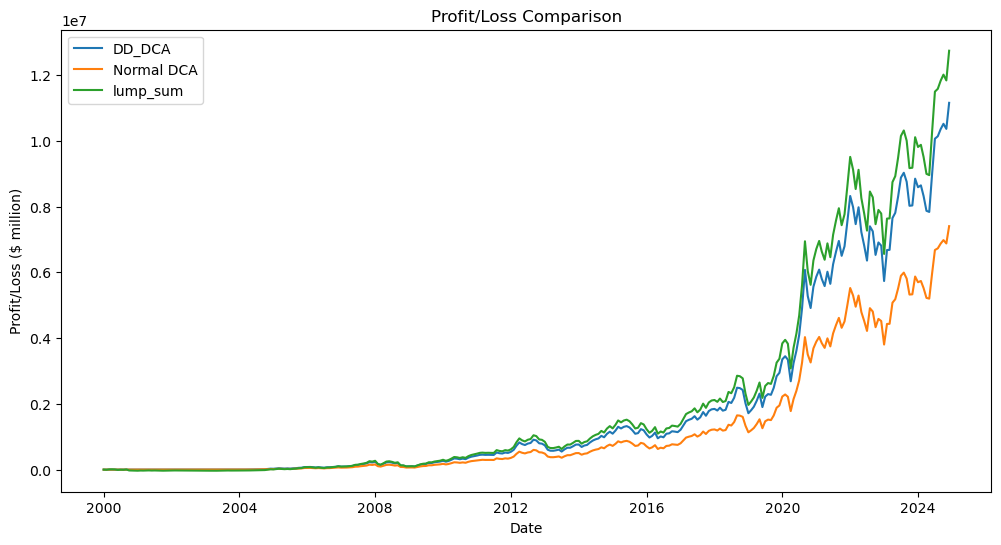

In [8]:
plot_profit_loss(result1,result2,result3, labels = ["DD_DCA", "Normal DCA", "lump_sum"])

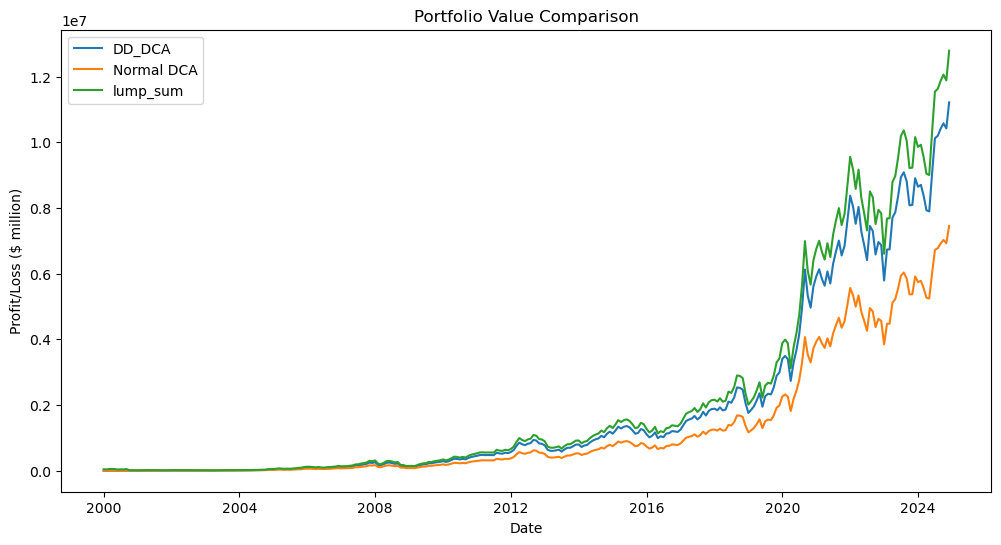

In [9]:
plot_portf_value(result1, result2, result3, labels=["DD_DCA", "Normal DCA", "lump_sum"])

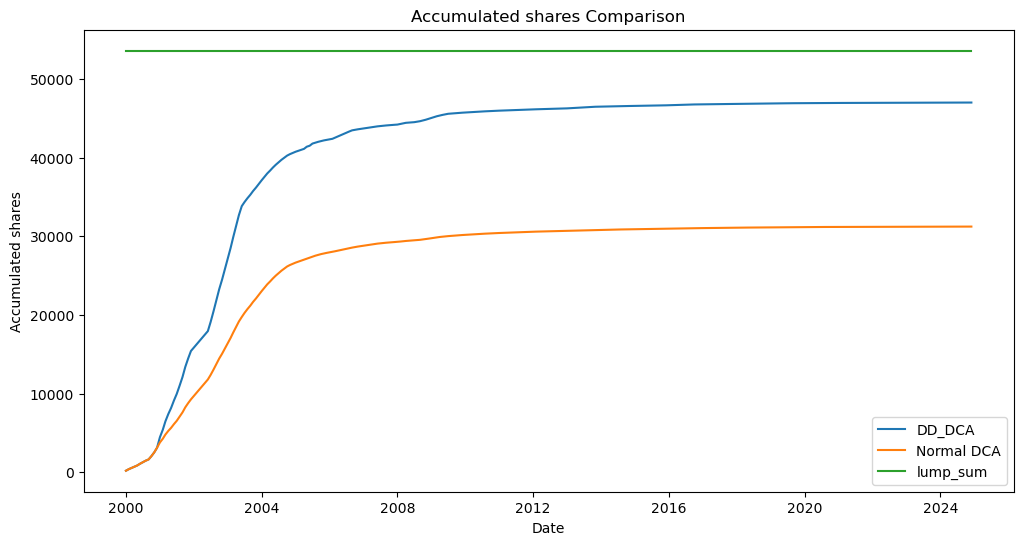

In [10]:
plot_shares_total(result1, result2, result3, labels=["DD_DCA", "Normal DCA", "lump_sum"])

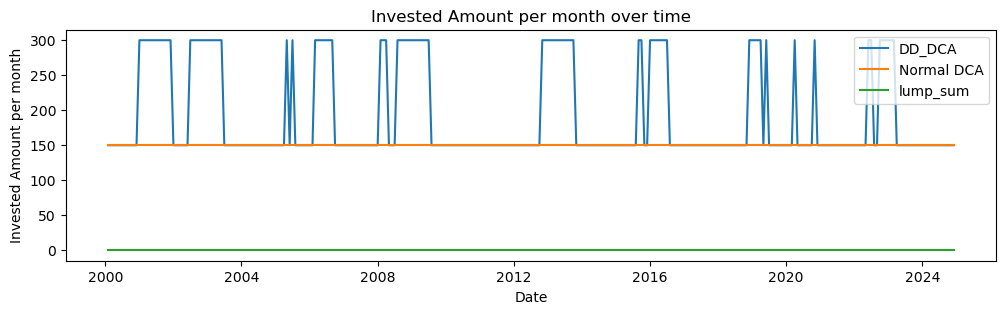

In [11]:
plot_monthly_investment(result1, result2, result3, labels=["DD_DCA", "Normal DCA", "lump_sum"])

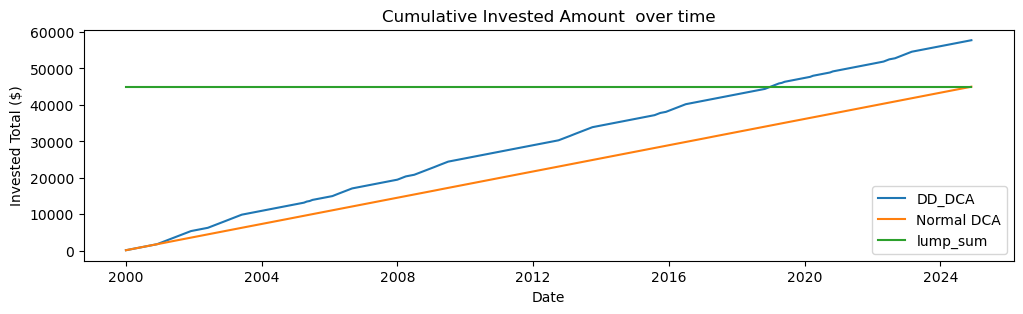

In [12]:
plot_invested_total(result1, result2, result3, labels=["DD_DCA", "Normal DCA", "lump_sum"])